<div align="center">
  <h2>EDA (Exploratory Data Analysis)</h2>
</div>

Importar las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En el archivo [Extracción_datos.ipynb](Extracción_datos.ipynb) realicé todo el procedimiento de extracción de los datos desde la **API CoinGecko** y la elección de las 10 criptomonedas. Finalmente guardé los archivos necesarios en formato CSV y lo importaré aquí para su respectivo análisis y elaboración del EDA.

In [2]:
bitcoin_df = pd.read_csv("Data/bitcoin.csv")
ethereum_df = pd.read_csv("Data/ethereum.csv")
tether_df = pd.read_csv("Data/tether.csv")
binancecoin_df = pd.read_csv("Data/binancecoin.csv")
ripple_df = pd.read_csv("Data/ripple.csv")
usd_coin_df = pd.read_csv("Data/USDcoin.csv")
staked_ether_df = pd.read_csv("Data/StakedEther.csv")
dogecoin_df = pd.read_csv("Data/dogecoin.csv")
cardano_df = pd.read_csv("Data/cardano.csv")
solana_df = pd.read_csv("Data/solana.csv")

In [33]:
bitcoin_df.head()

,fecha,precio,capitalizacion,volumen_total
0,2020-12-22,22840.99,424329939581.78,38423396405.39
1,2020-12-23,23794.79,441752551013.19,38733771616.27
2,2020-12-24,23308.13,433051601800.69,42917744239.82
3,2020-12-25,23760.29,441614502954.16,36826373658.97
4,2020-12-26,24671.11,458416319552.32,36622874229.83


El idioma y la denominación de las variables tienen que estar unificadas, por eso, revisaré uno de los DataFrames para asegurarme si cumple con esas características

In [3]:
bitcoin_df.head()

,timestamp,precio,market_cap,total_volumen
0,2020-12-22,22840.991707,4.243299e+11,3.842340e+10
1,2020-12-23,23794.793303,4.417526e+11,3.873377e+10
2,2020-12-24,23308.127232,4.330516e+11,4.291774e+10
3,2020-12-25,23760.287049,4.416145e+11,3.682637e+10
4,2020-12-26,24671.107714,4.584163e+11,3.662287e+10


Como estoy trabajando con variables en **español**, voy a unificar todas al mismo idioma y lo haré para todos los DataFrames de criptomonedas, ya que todas tienen el mismo formato y los mismos nombres en las columnas.

In [4]:
reemplazar_nombres = {
    'timestamp': 'fecha',
    'precio': 'precio',
    'market_cap': 'capitalizacion',
    'total_volumen': 'volumen_total'
}
dataframes_criptomonedas = [
    bitcoin_df,
    ethereum_df,
    tether_df,
    binancecoin_df,
    ripple_df,
    usd_coin_df,
    staked_ether_df,
    dogecoin_df,
    cardano_df,
    solana_df
]
for i in dataframes_criptomonedas:
    i.rename(columns=reemplazar_nombres, inplace=True)



No quiero que los números se muestren en notación científica y para evitarlo, ejecutaré el siguiente código

In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
bitcoin_df.head()

,fecha,precio,capitalizacion,volumen_total
0,2020-12-22,22840.99,424329939581.78,38423396405.39
1,2020-12-23,23794.79,441752551013.19,38733771616.27
2,2020-12-24,23308.13,433051601800.69,42917744239.82
3,2020-12-25,23760.29,441614502954.16,36826373658.97
4,2020-12-26,24671.11,458416319552.32,36622874229.83


En el EDA, es esencial entender la composición y las características de los datos que estamos utilizando. Las funciones: `df.info()`, `df.isnull().sum().any()`, `df.describe()` son herramientas valiosas para obtener información clave sobre un DataFrame.

**df.info()**

In [7]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           967 non-null    object 
 1   precio          967 non-null    float64
 2   capitalizacion  967 non-null    float64
 3   volumen_total   967 non-null    float64
dtypes: float64(3), object(1)
memory usage: 30.3+ KB


In [8]:
cardano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           967 non-null    object 
 1   precio          967 non-null    float64
 2   capitalizacion  967 non-null    float64
 3   volumen_total   967 non-null    float64
dtypes: float64(3), object(1)
memory usage: 30.3+ KB


La columna **fecha** representa la fecha en la que se registraron los datos, pero esta como *"object"*. Lo voy a convertir a formato *"datetime"* utilizando el siguiente código. <br> 
*Repito: los 10 dataframes de criptomendas tienen el mismo formato, entonces, si cuando revisamos la columna fecha de bitcoin y cardano tenía el formato "object", significa que los otros 8 dataframes también tenían el mismo formato. Por lo tanto, vamos a modificar el formato de la columna "fecha" para todas las criptomonedas*

In [9]:
dataframes = [bitcoin_df, ethereum_df, tether_df, binancecoin_df, ripple_df, usd_coin_df, staked_ether_df, dogecoin_df, cardano_df, solana_df]
for df in dataframes:
    df['fecha'] = pd.to_datetime(df['fecha'])

In [10]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           967 non-null    datetime64[ns]
 1   precio          967 non-null    float64       
 2   capitalizacion  967 non-null    float64       
 3   volumen_total   967 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 30.3 KB


Ahora voy a usar **df.isnull().sum().any()** para saber si existen valores nulos o no en el DataFrame

In [11]:
dataframes = [bitcoin_df, ethereum_df, tether_df, binancecoin_df, ripple_df, usd_coin_df, staked_ether_df, dogecoin_df, cardano_df, solana_df]
criptomoneda = ["Bitcoin", "Ethereum", "Tether", "BinanceCoin", "Ripple", "USD Coin", "Staked Ether", "Dogecoin", "Cardano", "Solana"]
for i, df in enumerate(dataframes):

    if df.isnull().sum().any():
        print(f"Hay valores nulos en {criptomoneda[i]}.")
    else:
        print(f"No hay valores nulos en {criptomoneda[i]}.")


No hay valores nulos en Bitcoin.
No hay valores nulos en Ethereum.
No hay valores nulos en Tether.
No hay valores nulos en BinanceCoin.
No hay valores nulos en Ripple.
No hay valores nulos en USD Coin.
No hay valores nulos en Staked Ether.
No hay valores nulos en Dogecoin.
No hay valores nulos en Cardano.
No hay valores nulos en Solana.


No hay valores nulos, porque los datos extraídos son desde el 22 de diciembre del 2020, recién desde esa fecha, Staked Ether registra precios en la API. Si hubiese tomado la fecha de lanzamiento de **Bitcoin** (2009), hubiesen habido muchos valores nulos para las otras criptomonedas. Esta fue la razón por la que opté tomar los registros ya desde el 22 de diciembre del 2020.

Antes de usar `df.describe()`, primero abordaremos los duplicados.

In [12]:
dataframes = [bitcoin_df, ethereum_df, tether_df, binancecoin_df, ripple_df, usd_coin_df, staked_ether_df, dogecoin_df, cardano_df, solana_df]
criptomoneda = ["Bitcoin", "Ethereum", "Tether", "BinanceCoin", "Ripple", "USD Coin", "Staked Ether", "Dogecoin", "Cardano", "Solana"]

for i, df in enumerate(dataframes):
    if df.duplicated().any():
        print(f"Hay duplicados en {criptomoneda[i]}.")
    else:
        print(f"No hay duplicados en {criptomoneda[i]}.")

No hay duplicados en Bitcoin.
No hay duplicados en Ethereum.
No hay duplicados en Tether.
No hay duplicados en BinanceCoin.
No hay duplicados en Ripple.
No hay duplicados en USD Coin.
No hay duplicados en Staked Ether.
No hay duplicados en Dogecoin.
No hay duplicados en Cardano.
No hay duplicados en Solana.


No hay valores duplicados en los dataframes

Ahora que ya estoy segura de que no hay valores nulos o duplicados, usaré `df.describe()`

**Bitcoin**

In [13]:
bitcoin_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,35025.67,663801708294.69,33251430162.89
min,2020-12-22 00:00:00,15742.44,301963847693.53,3882362454.22
25%,2021-08-20 12:00:00,23323.52,446422636749.33,20448285321.03
50%,2022-04-19 00:00:00,31865.75,598703019611.45,29356191956.18
75%,2022-12-16 12:00:00,44975.53,846879362044.44,41653655197.55
max,2023-08-15 00:00:00,67617.02,1278797895528.36,178894068361.35
std,NaN,13169.20,243846665170.06,19127231420.29


En la descripción del bitcoin se observa que el precio mínimo es de 15742.44 dólares y el máximo, de 67617.02. Se podría decir que el precio máximo y mínimo son iguales al *ath*: Precio máximo histórico (All-Time High) alcanzado por la criptomoneda y al *atl*: Precio mínimo histórico (All-Time Low) alcanzado por la criptomoneda respectivamente, pero esto no es del todo cierto. Para empezar, en el archivo [Extracción_datos.ipynb](Extracción_datos.ipynb), específamente en el dataframe _`df_coins_markets`_ podemos observar estos parámetros y sus fechas. Resulta que el *ath* de **bitcoin** es 69045.00, muy cercano al precio máximo que se puede observar en nuestra tabla de descripción. Esto pasa porque el *ath* se registró en una hora específica y el registro de precio que tengo es de un día y como los precios de las criptomonedas suelen variar mucho, hace que el resultado no sea el mismo, pero es bastante cercano. El *atl* se registró el 06/07/2013 y nuestros datos son recién desde el 22 de diciembre del 2020, por eso el precio mínimo no coincide con el *atl*. <br>
En los otros dataframes se mostraran las mismas características, por eso me enfocaré en otros aspectos como la desviación estándar.

**Precio** <br>
La media (mean) es 35,037.45. <br>
La desviación estándar (std) es 13,180.31. <br>
Esto significa que los valores del precio tienden a variar alrededor de 13,180.31 desde el valor promedio de 35,037.45. Los precios pueden fluctuar considerablemente respecto al promedio.

**Capitalización** <br>
La media (mean) es 663,994,116,119.51. <br>
La desviación estándar (std) es 244,062,774,903.66. <br>
Esto significa que los valores de capitalización tienden a variar alrededor de 244,062,774,903.66 desde el valor promedio de 663,994,116,119.51. Al igual que con el precio, hay una considerable variabilidad en las capitalizaciones con respecto al promedio.

**Volumen Total (volumen_total)** <br>
La media (mean) es 33,302,558,955.01. <br>
La desviación estándar (std) es 19,113,198,988.01. <br>
Esto significa que los valores individuales de volumen tienden a variar alrededor de 19,113,198,988.01 desde el valor promedio de 33,302,558,955.01. Al igual que con el precio y la capitalización, hay una considerable variabilidad en los volúmenes totales con respecto al promedio.

**Una desviación estándar alta indica que los valores individuales están bastante dispersos alrededor del valor promedio, lo que significa que hay una mayor variabilidad en los datos. La variabilidad es un indicador de la volatilidad. *A mayor volatilidad, mayor riesgo***.

**Ethereum**

In [14]:
ethereum_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,2219.31,263375856415.28,19859595568.19
min,2020-12-22 00:00:00,587.96,67468061368.14,2179799161.04
25%,2021-08-20 12:00:00,1572.96,188805559436.81,9605552070.06
50%,2022-04-19 00:00:00,1874.69,224855185617.99,16404512934.34
75%,2022-12-16 12:00:00,2871.49,341178196195.20,24860506327.17
max,2023-08-15 00:00:00,4815.00,571665766496.09,140906534190.59
std,NaN,922.05,108573088927.98,15108629172.87


Al igual que en **Bitcoin** se puede observar que hay gran variabilidad respecto a la media en el precio, capitalización y volumen total. 

**Tether**

In [15]:
tether_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,1.00,67144384145.33,60801899858.23
min,2020-12-22 00:00:00,0.99,20352568043.26,6894277527.26
25%,2021-08-20 12:00:00,1.00,64624586422.12,33848666676.43
50%,2022-04-19 00:00:00,1.00,68465349602.00,51924932037.70
75%,2022-12-16 12:00:00,1.00,78523211489.66,72087626587.38
max,2023-08-15 00:00:00,1.01,83895071911.89,926767674515.14
std,NaN,0.00,15307850570.48,54550287227.34


En **Tether** se observa que la desviación estádar en el precio es 0, esto significa que no hay variabilidad respecto a la media, que en términos de precio es muy estable. <br>
¿Por qué **Tether** tiene esta característica muy particular en comparación con las otras criptomonedas?<br> 
La respeusta es muy sencilla: **Tether** es una stablecoin.<br>
El valor de **Tether** está respaldado por el dólar estadounidense y en teoría, 1 USDT siempre debería valer aproximadamente 1 USD. <br>
**Una stablecoin es un tipo de criptomoneda que está diseñada para mantener su valor relativamente estable en comparación con otras criptomonedas volátiles** 

**BinanceCoin**

In [16]:
binancecoin_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,333.34,53557952919.75,1774162079.59
min,2020-12-22 00:00:00,31.30,4660064269.51,17764481.57
25%,2021-08-20 12:00:00,268.89,42563422538.20,656660447.33
50%,2022-04-19 00:00:00,311.04,49226381036.03,1215531869.41
75%,2022-12-16 12:00:00,401.05,65007994977.65,2023062013.02
max,2023-08-15 00:00:00,675.10,110441230385.45,22103516567.71
std,NaN,123.78,20676822224.19,1947345319.82


En **BinanceCoin** también se puede apreciar que hay una alta variabilidad con respecto a la media. La volatilidad es una característica muy común de las criptomonedas.

**Ripple**

In [17]:
ripple_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,0.64,30620658783.93,3772468406.20
min,2020-12-22 00:00:00,0.21,9633436313.89,231622343.96
25%,2021-08-20 12:00:00,0.39,19632863203.77,1237002952.95
50%,2022-04-19 00:00:00,0.52,25824265989.04,2500106156.59
75%,2022-12-16 12:00:00,0.82,38847131025.17,4243862492.20
max,2023-08-15 00:00:00,1.84,84389055763.72,62468131981.57
std,NaN,0.31,13909541834.59,4721200091.54


A comparación de otras criptomonedas, **Ripple** tiene un precio muy bajo, ya que el precio máximo solo fue de 1.84; aunque tuvo un *ath* de 3.40 el 07/01/2018. Esta información se puede verficar en el archiv [Extracción_datos.ipynb](Extracción_datos.ipynb), específamente en el dataframe _`df_coins_markets`_.

**USD Coin**

In [18]:
usd_coin_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,1.00,35265584191.78,3727709317.48
min,2020-12-22 00:00:00,0.97,3354936550.20,827657720.27
25%,2021-08-20 12:00:00,1.00,26985000945.09,2260529601.38
50%,2022-04-19 00:00:00,1.00,36290783741.91,3165796909.31
75%,2022-12-16 12:00:00,1.00,48704201829.76,4435148437.33
max,2023-08-15 00:00:00,1.01,56159787682.47,110291776337.19
std,NaN,0.00,14825246331.45,4047913890.66


**USD Coin** también es una stablecoin al igual que **Tether**, por esta razón es que no presenta variabilidad respecto al precio

**Staked Ether**

In [19]:
staked_ether_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,2201.65,6073382625.93,22945868.61
min,2020-12-22 00:00:00,596.77,0.00,62.18
25%,2021-08-20 12:00:00,1563.13,2821280866.64,3499707.97
50%,2022-04-19 00:00:00,1871.91,5922630635.07,10173832.81
75%,2022-12-16 12:00:00,2865.97,8247322526.48,22670334.48
max,2023-08-15 00:00:00,4775.45,15394436577.33,834985189.58
std,NaN,920.94,4047779542.53,53180014.79


**Dogecoin**

In [20]:
dogecoin_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,0.13,17555002109.27,2055989524.99
min,2020-12-22 00:00:00,0.00,493809267.62,127614763.74
25%,2021-08-20 12:00:00,0.07,9187234654.60,423882297.41
50%,2022-04-19 00:00:00,0.08,11630176833.70,827247230.62
75%,2022-12-16 12:00:00,0.18,23400142752.85,1707285253.74
max,2023-08-15 00:00:00,0.68,88794768977.21,50960650646.95
std,NaN,0.10,12868524844.94,4496030664.91


**Cardano**

In [21]:
cardano_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,0.89,29052550625.40,1874759425.38
min,2020-12-22 00:00:00,0.14,4367651955.03,89086469.11
25%,2021-08-20 12:00:00,0.37,12851757234.89,408277093.46
50%,2022-04-19 00:00:00,0.54,18177212772.20,952035463.44
75%,2022-12-16 12:00:00,1.28,41165553351.24,2518698029.53
max,2023-08-15 00:00:00,2.97,95003730487.98,17436012662.32
std,NaN,0.65,20416913336.92,2308757252.80


**Solana**

In [22]:
solana_df.describe()

,fecha,precio,capitalizacion,volumen_total
count,967,967.00,967.00,967.00
mean,2022-04-19 00:00:00,57.12,18116496558.58,1238858440.77
min,2020-12-22 00:00:00,1.21,56718890.09,8569139.63
25%,2021-08-20 12:00:00,20.82,7733929886.40,388100133.40
50%,2022-04-19 00:00:00,32.43,10638298323.85,834922127.31
75%,2022-12-16 12:00:00,84.63,27065295272.00,1631174760.26
max,2023-08-15 00:00:00,259.24,77427308372.13,16149087501.30
std,NaN,58.00,17464666763.56,1336919779.47


**Staked Ether**, **Dogecoin**, **Cardano** y **Solana** presentan volatilidad alta respecto al precio, capitalización y volumen total.

Para uniformizar el estilo de las gráficas, utilizaré la siguiente función de la biblioteca Seaborn.

In [23]:
sns.set(style="darkgrid")

Verificaréla existencia de valores atípicos <br>
**boxplot** es un gráfico muy usado para visualizar los outliers <br>


**Bitcoin**

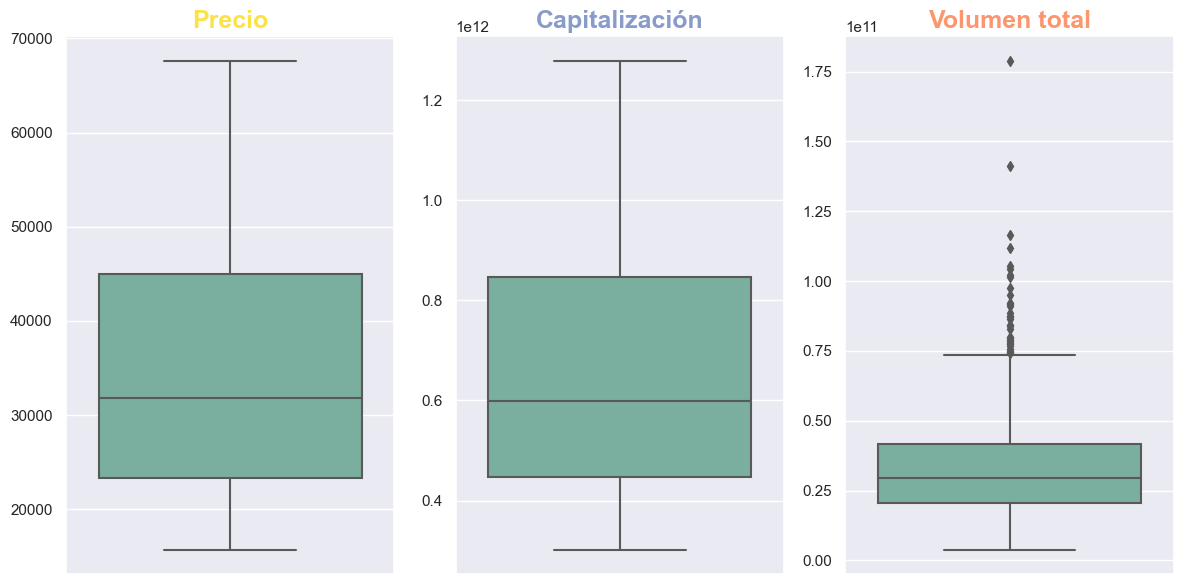

In [24]:
paleta_personalizada = ["#72B6A1", "#FCE246", "#899CC9", "#FC966E"]  # Colores personalizados

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

sns.boxplot(y=bitcoin_df["precio"], ax=axes[0], palette=[paleta_personalizada[0]])
axes[0].set_title("Precio", family='sans-serif', color=paleta_personalizada[1], weight='bold', size=18)
axes[0].set_ylabel('')

sns.boxplot(y=bitcoin_df["capitalizacion"], ax=axes[1], palette=[paleta_personalizada[0]])
axes[1].set_title("Capitalización", family='sans-serif', color=paleta_personalizada[2], weight='bold', size=18)
axes[1].set_ylabel('')

sns.boxplot(y=bitcoin_df["volumen_total"], ax=axes[2], palette=[paleta_personalizada[0]])
axes[2].set_title("Volumen total", family='sans-serif', color=paleta_personalizada[3], weight='bold', size=18)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

La columna _`volumen_total`_ tiene outliers, pero esto es más que nada solo para ver el comportamiento del mercado del bitcoin, no podemos eliminar o aplicar alguna otra medida; porque el volumen total es la cantidad total de la criptomoneda que se ha intercambiado en todas las operaciones realizadas en los mercados durante un un día.

Ahora veamos si existen valores atípicos en una *stablecoin*. <br>
Analizaremos **Tether**

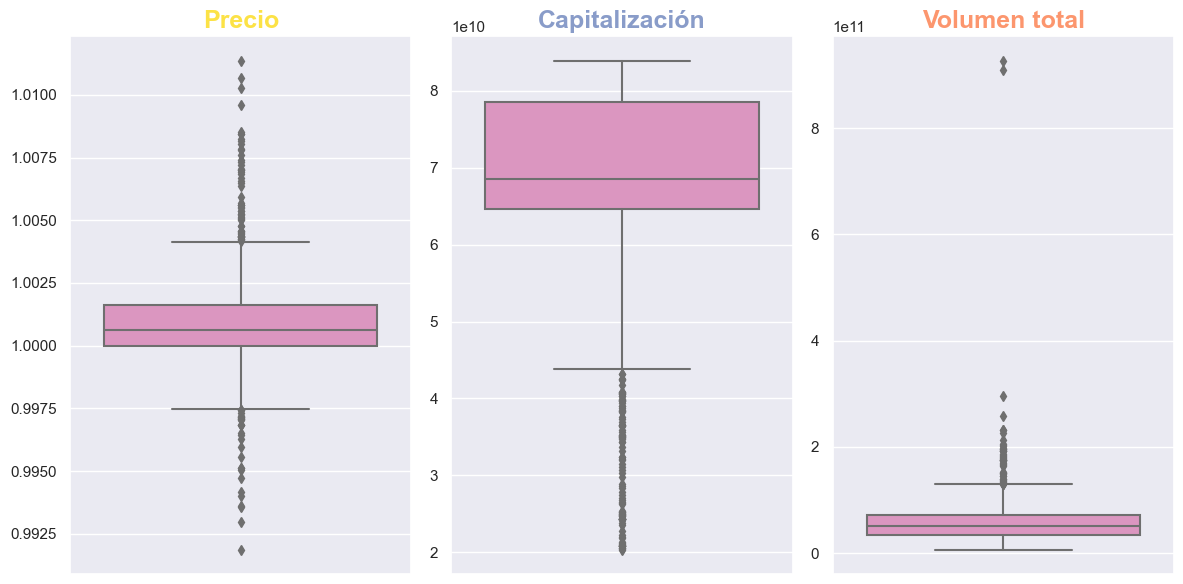

In [25]:
paleta_personalizada = ["#E78AC3", "#FCE246", "#899CC9", "#FC966E"]  # Colores personalizados

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

sns.boxplot(y=tether_df["precio"], ax=axes[0], palette=[paleta_personalizada[0]])
axes[0].set_title("Precio", family='sans-serif', color=paleta_personalizada[1], weight='bold', size=18)
axes[0].set_ylabel('')

sns.boxplot(y=tether_df["capitalizacion"], ax=axes[1], palette=[paleta_personalizada[0]])
axes[1].set_title("Capitalización", family='sans-serif', color=paleta_personalizada[2], weight='bold', size=18)
axes[1].set_ylabel('')

sns.boxplot(y=tether_df["volumen_total"], ax=axes[2], palette=[paleta_personalizada[0]])
axes[2].set_title("Volumen total", family='sans-serif', color=paleta_personalizada[3], weight='bold', size=18)
axes[2].set_ylabel('')
plt.tight_layout()
plt.show()

En estas gráficas se pueden observar muchos valores atípicos, pero como mencioné anteriormente, es el comportamiento del mercado de esta criptomoneda que hace que hayan muchos outliers y no podemos eliminarlar o aplicar algún otro ajuste, porque eso afectaría el análisis real del mercado.<br>
En el precio de **tether** parece que existen muchos valores atípicos, esto se presenta así, porque el promedio es de 1 dólar y existen pequeñas variaciones respecto al precio.<br>
La desviación estándar era de cero, pero como todos los números se están presentando en solo dos decimales, lo más seguro es que al ser una mínima variación respecto al precio, no se haya detectado eso es la desviación estándar.

**Tener en cuenta que, en las gráficas tanto para Bitcoin como para Tether, en las variables "capitalizacion" y "volumen_total" la escala en el eje "y" está representada por números en notación científica. Esto porque los números son muy grandes en esas dos variables**

Visualmente, puede resultar abrumador realizar gráficos de cajas para todas las criptomonedas, por eso, de acuerdo a mi perspectiva, opté por realizar estos gráficas solo para estas 2 criptomonedas

## Ahora veré la evolución del precio de las criptomonedas, ya que este es la variable más importante de las criptomonedas

In [26]:
colores_por_cripto = {
    "Bitcoin": "#72B6A1",
    "Ethereum": "#FC8D62",
    "Tether": "#E78AC3",
    "BinanceCoin": "#8DA0CB",
    "Ripple": "#A6D854",
    "USD Coin": "#FFD92F",
    "Staked Ether": "#E5C494",
    "Dogecoin": "#B3B3B3",
    "Cardano": "#88011D",
    "Solana": "#313D4C"
}

**Evolución del precio de *Bitcoin*** <br>

*Opté por graficar únicamente **Bitcoin** porque es la criptomeda que tiene el precio mucho mayor que el resto. Si grafico todas juntas, podría distorcionar la escala y no se visualizaría bien la tendencia de las otras criptomonedas.*

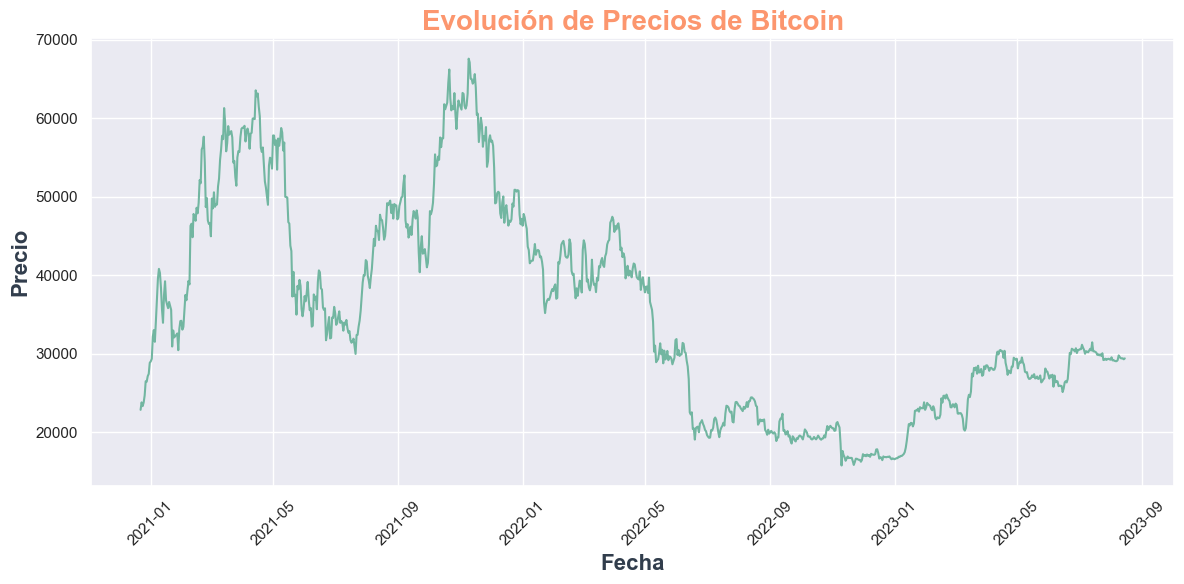

In [27]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=bitcoin_df, x="fecha", y="precio", color=colores_por_cripto["Bitcoin"])

plt.title("Evolución de Precios de Bitcoin", family='sans-serif', color="#FC966E", weight='bold', fontsize=20)
plt.xlabel("Fecha", family='sans-serif', color="#313D4C", weight='bold', fontsize=16)
plt.ylabel("Precio", family='sans-serif', color="#313D4C", weight='bold', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La gráfica muestra que el **Bitcoin** experimentó su pico más alto aproximadamente en noviembre de 2021.

**Evolución del precio de las criptomonedas sin *Bitcoin***

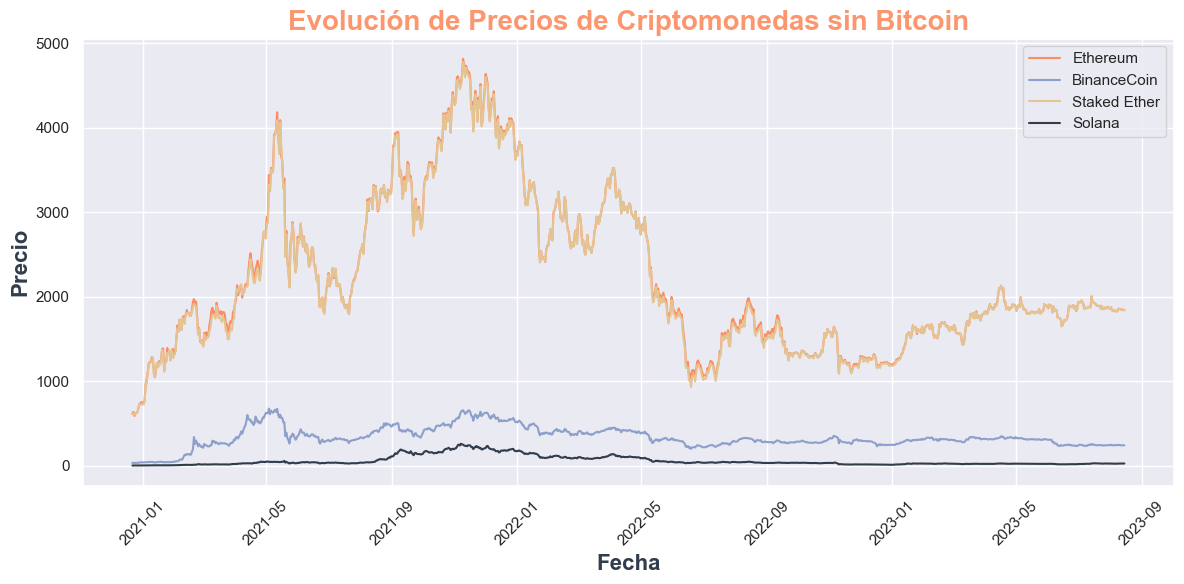

In [28]:
dataframes = [ethereum_df, binancecoin_df, staked_ether_df, solana_df]
criptomonedas = ['Ethereum', 'BinanceCoin', 'Staked Ether', 'Solana']

plt.figure(figsize=(12, 6))
for df, cripto in zip(dataframes, criptomonedas):
    sns.lineplot(data=df, x="fecha", y="precio", label=cripto, color=colores_por_cripto[cripto])

plt.title("Evolución de Precios de Criptomonedas sin Bitcoin", family='sans-serif', color="#FC966E", weight='bold', fontsize=20)
plt.xlabel("Fecha", family='sans-serif', color="#313D4C", weight='bold', fontsize=16)
plt.ylabel("Precio", family='sans-serif', color="#313D4C", weight='bold', fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**stETH (Staked Ether)** es un token que se obtiene a través del staking de **ETH (Ethereum)** en la Beacon Chain de Ethereum 2.0 mediante Lido; por esto es que se ve una marcada similitud en la tendencia del precio de estos dos activos digitales.

**Evolución de las criptomonedas que tienen los precios más bajos del mercado**

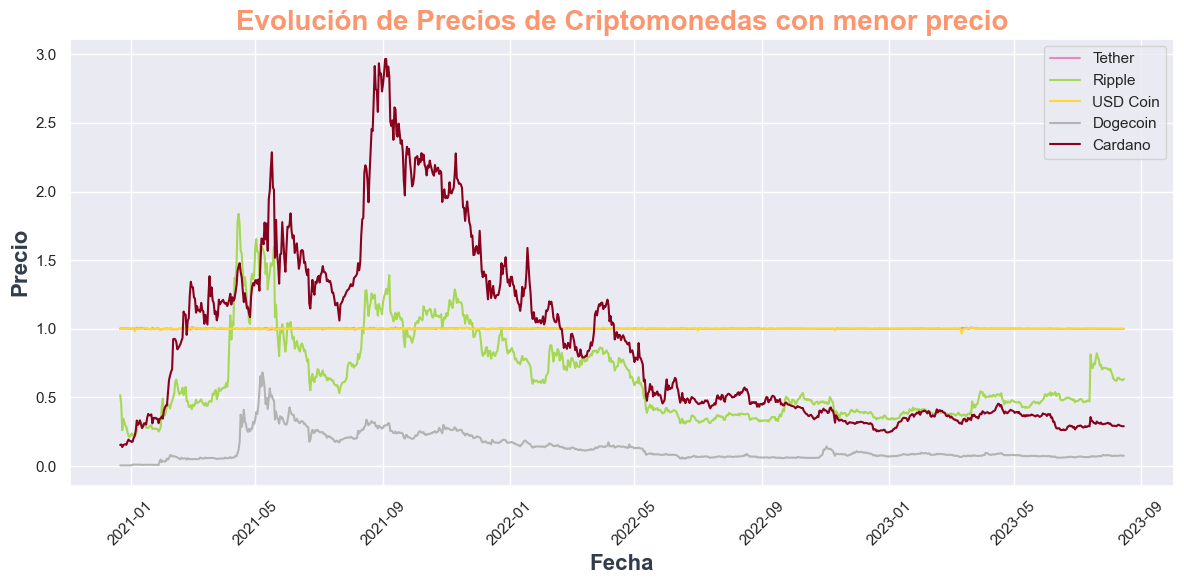

In [29]:
dataframes = [tether_df, ripple_df, usd_coin_df, dogecoin_df, cardano_df]
criptomonedas = ['Tether', 'Ripple', 'USD Coin', 'Dogecoin', 'Cardano']
plt.figure(figsize=(12, 6))

for df, cripto in zip(dataframes, criptomonedas):
    sns.lineplot(data=df, x="fecha", y="precio", label=cripto, color=colores_por_cripto[cripto])

plt.title("Evolución de Precios de Criptomonedas con menor precio", family='sans-serif', color="#FC966E", weight='bold', fontsize=20)
plt.xlabel("Fecha", family='sans-serif', color="#313D4C", weight='bold', fontsize=16)
plt.ylabel("Precio", family='sans-serif', color="#313D4C", weight='bold', fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Conclusión general de la evolución del precio de las criptomonedas** <br>

Desde mediados de 2022, se ha observado una marcada tendencia a la baja en el precio de la mayoría de las criptomonedas y que desde entonces no han vuelto a subir como antes.

Es interesante notar que dentro de las 10 criptomonedas, las dos stablecoins presentaron un comportamiento distinto (**Tether** y **USD Coin**). Estas stablecoins se mantuvieron relativamente constantes en su valor (1 USD) a lo largo del período estudiado. Esto se debe a su naturaleza como activos diseñados para mantener un valor estable, respaldado generalmente por monedas fiduciarias.

La tendencia a la baja en el precio de las criptomonedas en el último año puede ser resultado de varios factores, como la percepción del mercado y otros eventos que impactan en la demanda y la oferta de estos activos digitales.

## Matriz de correlación

Es muy importante realizar la matriz de correlación para saber si esxiste una relación lineal entre las variables.

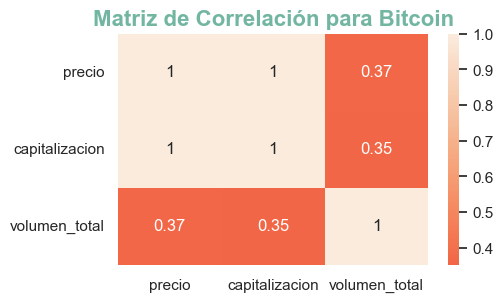

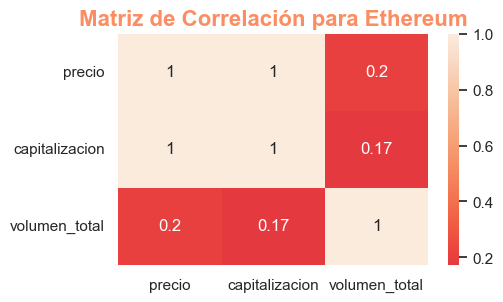

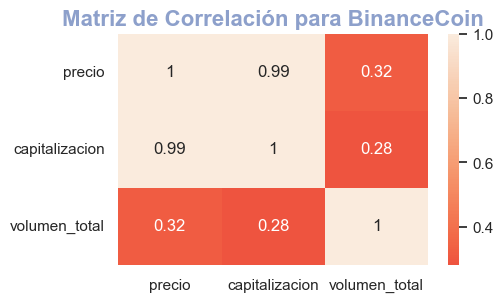

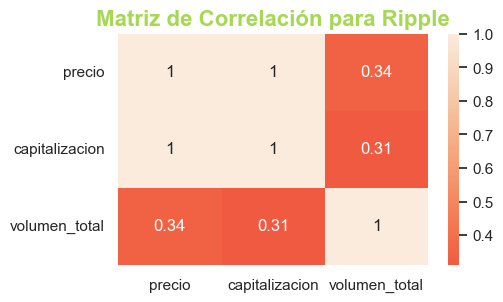

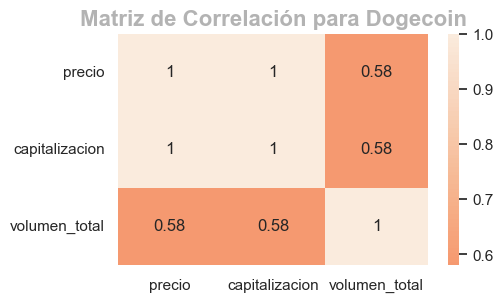

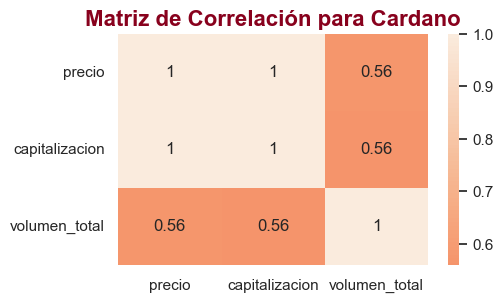

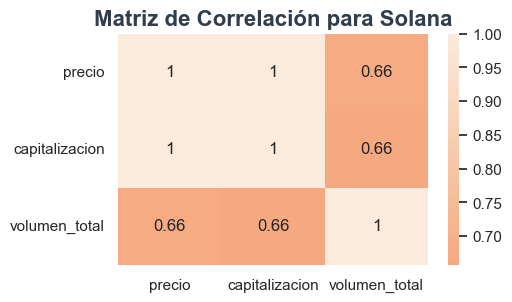

In [30]:
dataframes = [bitcoin_df, ethereum_df, binancecoin_df, ripple_df, dogecoin_df, cardano_df, solana_df]
criptomonedas = ['Bitcoin', 'Ethereum', 'BinanceCoin', 'Ripple', 'Dogecoin', 'Cardano', 'Solana']
for df, cripto in zip(dataframes, criptomonedas):
    df_numeric = df.drop(columns=['fecha'])
    correlation_matrix = df_numeric.corr()
    
    plt.figure(figsize=(5, 3))
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("rocket", as_cmap=True), center=0)
    heatmap.set_title(f"Matriz de Correlación para {cripto}", fontsize=16, color=colores_por_cripto[cripto], family='sans-serif', weight='bold')
    plt.show()

En estas 7 criptomonedas, existe una correlación lineal de 1 o cercano a 1 entre el precio y la capitalización. Significa que, si una de estas variables aumenta, la otra también aumentará casi en la misma proporción. Está correlación es bastante normal en este tipo de mercado, porque la capitalización depende del precio; es decir, la capitalización resulta de multiplicar el precio por la cantidad total en circulación de la criptomoneda.<br> *No analicé la circulación de la criptomoneda aquí, porque facilmente se puede obtener dividiendo la capitalización por el precio.*

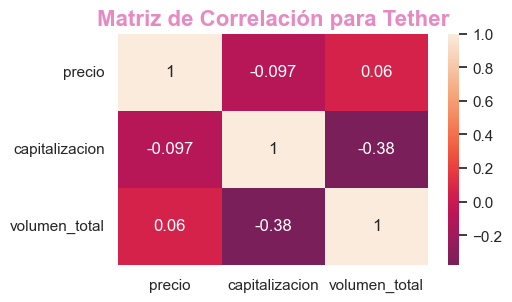

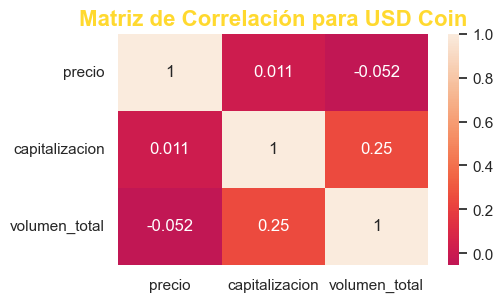

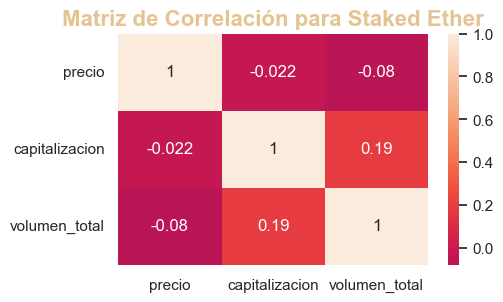

In [31]:
dataframes = [tether_df, usd_coin_df, staked_ether_df]
criptomonedas = ['Tether','USD Coin', 'Staked Ether']
for df, cripto in zip(dataframes, criptomonedas):
    df_numeric = df.drop(columns=['fecha'])
    correlation_matrix = df_numeric.corr()
    
    plt.figure(figsize=(5, 3))
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("rocket", as_cmap=True), center=0)
    heatmap.set_title(f"Matriz de Correlación para {cripto}", fontsize=16, color=colores_por_cripto[cripto], family='sans-serif', weight='bold')
    plt.show()

En estas 3 criptomonedas se puede observar que no existe una correlación perfecta entre el precio y la capitalización y este comportamiento es debido a que **Tether** y **USD Coin** son stablecoins, significa que el precio siempre se va mantener cercano a 1 USD debido a su naturaleza particular. **Staked Ether** es técnicamente un derivado de **Ethereum**, y esto hace que sus precios sean casi iguales. Entonces la variación de la capitalización, probablemente, depende de la variación en la cantidad de circulación de la criptomoneda en el mercado.

En general se observa que las correlaciones entre volumen total con el precio y la capitalización son menores a uno. Esto puede ser porque un cambio alto en el precio no necesariamente significa un mayor volumen en las transacciones. El volumen también puede ser influenciado por factores como la liquidez del mercado.
